In [4]:
# Import yfinance
import yfinance as yf
	
# Import pandas
import pandas as pd

# Download the datafile from yfinance
data = yf.download("GOOGL", start="2019-01-02", end="2020-04-30")[['Close']]
data.index = pd.to_datetime(data.index)
data.head().round(2)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,GOOGL
Date,
2019-01-02,52.48
2019-01-03,51.03
2019-01-04,53.65
2019-01-07,53.54
2019-01-08,54.01


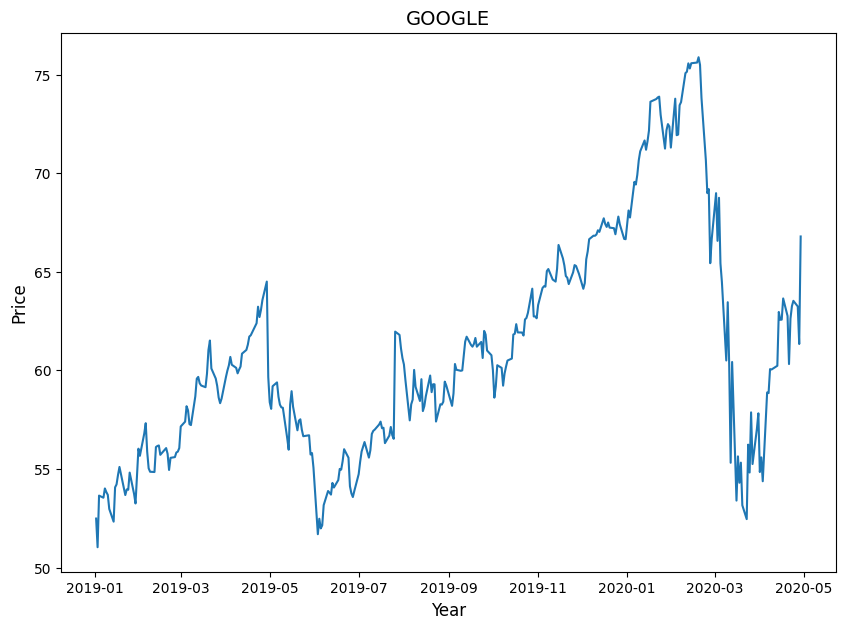

In [8]:
# Import matplotlib to plot the data
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('seaborn-darkgrid')

# Plot the time series
plt.figure(figsize=(10, 7))
plt.plot(data['Close'])
plt.title('GOOGLE', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

In [ ]:
X = data.Close
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

# both the values of the two means and the two variances differ significantly. This again suggests that the series is not stationary.
# You compared the summary statistics of the different partitions of the data for stationarity. A more reliable and convenient method to check the stationarity of a series is the different statistical tests that can be performed on the data to check if they are generated from a stationary process or not.

mean1=57.212762, mean2=64.569980
variance1=7.392693, variance2=30.089049


C:\Users\Eagle-TP\AppData\Local\Temp\ipykernel_21868\1611207172.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('mean1=%f, mean2=%f' % (mean1, mean2))
C:\Users\Eagle-TP\AppData\Local\Temp\ipykernel_21868\1611207172.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('variance1=%f, variance2=%f' % (var1, var2))


Augmented Dickey-Fuller Test - The Augmented Dickey-Fuller test is one of the most popular tests to check for stationarity. It tests the below hypothesis.

Null Hypothesis, H0: The time series is not stationary.

Alternative Hypothesis, H1: The time series is stationary.

If the p-value is less than or equal to 0.05 or the absolute value of the test statistics is greater than the critical value, you reject H0 and conclude that the time series is stationary.

If the p-value is greater than 0.05 or the absolute value of the test statistics is less than the critical value, you fail to reject H0 and conclude that the time series is not stationary.

In [ ]:
# Import adfuller
from statsmodels.tsa.stattools import adfuller

result = adfuller(data.Close)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

# As you can see, the p-value is greater than 0.05. You fail to reject the null hypothesis and conclude that the time series is not stationary.

ADF Test Statistic: -2.31
5% Critical Value: -2.87
p-value: 0.17


In [ ]:
# Import kpss
from statsmodels.tsa.stattools import kpss

result = kpss(data.Close)
print(result)
print('KPSS Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[3]['5%'])
print('p-value: %.2f' % result[1])
# As you can see, the p-value is less than 0.05. You reject the null hypothesis and conclude that the time series is not stationary. This is consistent with the result obtained with the ADF test.

(np.float64(1.3785932315337464), np.float64(0.01), 11, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS Test Statistic: 1.38
5% Critical Value: 0.46
p-value: 0.01


C:\Users\Eagle-TP\AppData\Local\Temp\ipykernel_21868\2423430775.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(data.Close)


# Transforming a Non-Stationary Series into a Stationary Series

Since stationary series are easy to analyze, you can convert a non-stationary series into a stationary series by the method of Differencing. In fact, it is necessary to convert a non-stationary series into a stationary series in order to use time series forecasting models.

In this method, the difference of consecutive terms in the series is computed as below.

Consecutive terms in the series is computed
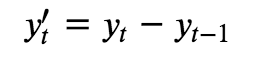

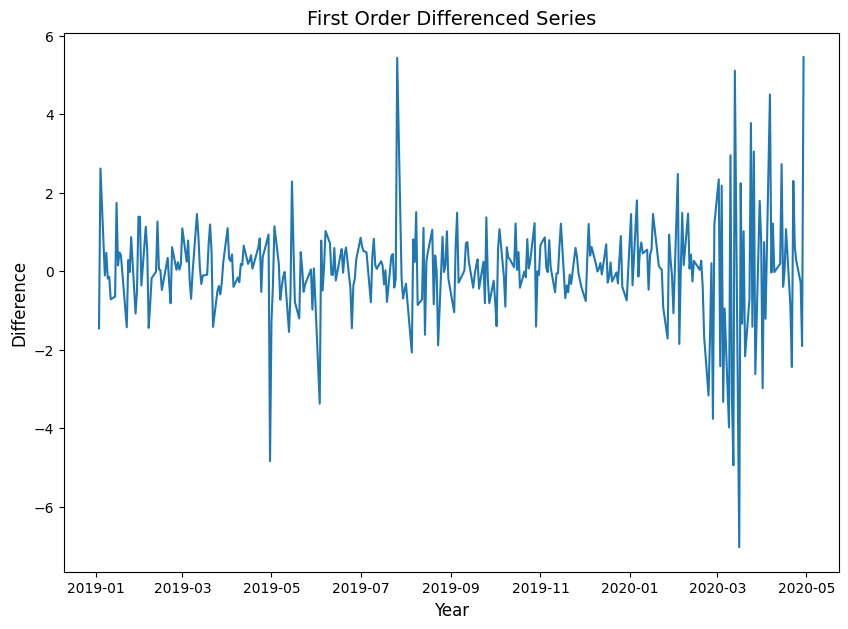

In [14]:
# Change for (t)th day is Close for (t)th day minus Close for (t-1)th day.
data['Difference'] = data['Close'].diff()

# Plot the Change
plt.figure(figsize=(10, 7))
plt.plot(data['Difference'])
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

In [ ]:
result = adfuller(data.Difference.dropna())
print(result)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

# As you can see, the p-value is less than 0.05. You reject the null hypothesis and conclude that the time series is stationary.

(np.float64(-4.603926220670182), np.float64(0.00012703430312135464), 8, 324, {'1%': np.float64(-3.450695263332383), '5%': np.float64(-2.87050218926466), '10%': np.float64(-2.5715449066453284)}, np.float64(1002.5965124790603))
ADF Test Statistic: -4.60
5% Critical Value: -2.87
p-value: 0.00
